<a href="https://colab.research.google.com/github/Latamila/ConsumoEnergiaSerieTemporal/blob/main/IAnaContabilidade_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A base de dados é composta por indicadores e medidas financeiras usados em relatórios contabeis.

O principal objetivo é construir um modelo de IA que seja capaz de prever indicadores financeiros em uma base trimestral, oferecendo uma visão mais detalhada e prognostica do desempenho financeiro da empresa.

Ao integrar a modelagem de serie temporal e análise preditiva, busca-se oferecer insights mais precisos e acionáveis para tomada de decisões estratégicas.

#Planejamento  Financeiro:

Auxilia  na  elaboração  de  orçamentos,  forecasts  e  na otimização de recursos, permitindo ajustes proativos e estratégicos baseados nas previsões do modelo.
#Gestão  de  Riscos:

Permite  a  identificação  antecipada  de  possíveis  desequilíbrios financeiros e riscos potenciais, possibilitando a implementação de medidas corretivas de maneira tempestiva.

#Análise  de  Desempenho:

Oferece insights sobre o desempenho financeiro passado e futuro da empresa, facilitando a avaliação de metas, resultados e a eficácia das estratégias de negócios.

#Desenvolvimento  Estratégico:

Fornece  informações  valiosas  para  a  formulação  de estratégias de negócios, desenvolvimento de novos produtos e expansão de mercado, baseadas em dados e análises preditivas.

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark.
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00


In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
# Imports
import pandas as pd
import numpy as np
import sklearn
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 1.5.3
sklearn   : 1.2.2
numpy     : 1.23.5
tensorflow: 2.15.0
matplotlib: 3.7.1



In [6]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [7]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [8]:
df_dsa.shape

(63, 8)

In [9]:
df_dsa.head()

,meses,receita_total_ops,custo_func,depreciacao,outras_despesas,outras_receitas,juros,lucro_ou_prejuizo_liquido_do_periodo
0,2023-06,1388.12,92.33,153.50,284.64,1528.18,784.27,194.15
1,2023-03,1383.82,86.93,152.50,304.13,1458.58,744.37,191.85
2,2022-12,1378.24,70.64,152.10,909.83,428.06,650.46,11.40
3,2022-09,1220.58,59.75,154.74,1339.39,514.67,632.22,-298.18
4,2022-06,1254.51,77.38,153.64,1564.59,597.48,653.34,-384.50


In [11]:
df_dsa = df_dsa.sort_values('meses')
#organização dos dados com sort_values baseado na coluna 'meses'
# Ordena os dados pela coluna que representa
#o tempo (isso é importante devido ao modelo que iremos usar)

In [13]:
#resete se faz com reset_index e apaga com drop = True
# Reset do índice (sempre que fizer qualquer alteração no dataframe)
df_dsa = df_dsa.reset_index(drop = True)

In [17]:
df_dsa[1:8]#pega as linhas do modelo

,meses,receita_total_ops,custo_func,depreciacao,outras_despesas,outras_receitas,juros,lucro_ou_prejuizo_liquido_do_periodo
1,2008-03,328.65,8.71,29.15,59.46,20.91,31.95,91.10
2,2008-06,253.73,8.61,31.16,45.64,20.04,39.60,96.80
3,2008-09,296.00,8.73,32.18,64.05,7.78,55.18,112.28
4,2008-12,300.89,8.91,34.75,87.28,2.39,49.51,100.81
5,2009-03,284.51,10.46,39.14,64.44,16.90,-11.35,151.19
6,2009-06,306.77,11.30,35.78,75.36,14.58,13.35,170.76
7,2009-09,327.37,12.68,38.92,80.97,9.97,20.35,174.79


In [18]:
list(df_dsa)[1:8]
#dessa forma retorna apenas o nome das colunas de 1 a 8

['receita_total_ops',
 'custo_func',
 'depreciacao',
 'outras_despesas',
 'outras_receitas',
 'juros',
 'lucro_ou_prejuizo_liquido_do_periodo']

In [20]:

# Definindo as variáveis que serão usadas
#para as previsões (variáveis de índice 1 a 8)
cols = list(df_dsa)[1:8]
#para pegar as colunas devemos fazer um objeto
#que recebe uma lista dos nomes das colunas

In [21]:
#visualiza as colunas
print(cols)

['receita_total_ops', 'custo_func', 'depreciacao', 'outras_despesas', 'outras_receitas', 'juros', 'lucro_ou_prejuizo_liquido_do_periodo']


In [23]:
#Vamos trocar o tipo de dados das variaveis com astype
#referiando a variavel 'cols' para apontar para o
#dataset df_dsa e alterar a estrutura dos dados

# Converte as variáveis para o tipo float a fim de aumentar
#a precisão dos cálculos e cria o dataframe de treino
df_treino = df_dsa[cols].astype(float)

In [24]:
df_treino.head()

,receita_total_ops,custo_func,depreciacao,outras_despesas,outras_receitas,juros,lucro_ou_prejuizo_liquido_do_periodo
0,205.35,6.22,26.89,56.44,4.65,30.67,52.44
1,328.65,8.71,29.15,59.46,20.91,31.95,91.10
2,253.73,8.61,31.16,45.64,20.04,39.60,96.80
3,296.00,8.73,32.18,64.05,7.78,55.18,112.28
4,300.89,8.91,34.75,87.28,2.39,49.51,100.81


In [25]:
df_treino.head()

,receita_total_ops,custo_func,depreciacao,outras_despesas,outras_receitas,juros,lucro_ou_prejuizo_liquido_do_periodo
0,205.35,6.22,26.89,56.44,4.65,30.67,52.44
1,328.65,8.71,29.15,59.46,20.91,31.95,91.10
2,253.73,8.61,31.16,45.64,20.04,39.60,96.80
3,296.00,8.73,32.18,64.05,7.78,55.18,112.28
4,300.89,8.91,34.75,87.28,2.39,49.51,100.81


In [26]:
# Visualiza os 5 primeiros registros
df_treino.tail()

,receita_total_ops,custo_func,depreciacao,outras_despesas,outras_receitas,juros,lucro_ou_prejuizo_liquido_do_periodo
58,1254.51,77.38,153.64,1564.59,597.48,653.34,-384.50
59,1220.58,59.75,154.74,1339.39,514.67,632.22,-298.18
60,1378.24,70.64,152.10,909.83,428.06,650.46,11.40
61,1383.82,86.93,152.50,304.13,1458.58,744.37,191.85
62,1388.12,92.33,153.50,284.64,1528.18,784.27,194.15


##Pre-Processamento da Serie Temporal Multivariada


In [27]:
#cria o padronizador
scaler = StandardScaler()

In [28]:
#Treina o padronizador
scaler = scaler.fit(df_treino)

In [29]:
df_treino_scaled = scaler.transform(df_treino)

In [108]:
#cria listas vazias para X e Y
x_treino = []
y_treino = []

In [109]:
#numero de passos no tempo que queremos olhar para o futuro
#a fim de fazer previsões.Estamos trabalhando com uma serie trimestral, logo:
# 1 passo = 1 trimestre
n_futuro = 1

In [110]:
#numero de passos anteriores que queremos usar para
#prever o futuro
n_past = 15

In [111]:
#loop pelos dados padronizados para gerar as listas de dados
#para X e Y

for i in range(n_past, len(df_treino_scaled)-n_futuro + 1):
  #carrega X
  x_treino.append(df_treino_scaled[i - n_past : i, :])

  #carrega y
  y_treino.append(df_treino_scaled[i + n_futuro - 1 : i + n_futuro, 0])

In [112]:
# Converte as listas para array numpy
x_treino, y_treino = np.array(x_treino), np.array(y_treino)

In [113]:
# Tamanho do array
len(x_treino)

48

In [114]:
# Tamanho do array
len(y_treino)

48

In [115]:
x_treino.shape

(48, 15, 7)

In [116]:
y_treino.shape

(48, 1)

#CONSTRUÇÃO DO MODELO DE IA

In [117]:
# Cria a sequência de camadas da rede neural artificial
modelo_dsa = Sequential()

In [118]:
# Adiciona a camada LSTM com 128 neurônios, ativação sigmóide e somente uma sequência LSTM
modelo_dsa.add(LSTM(128,
                    activation = "sigmoid",
                    input_shape = (x_treino.shape[1], x_treino.shape[2]),
                    return_sequences = False))

In [119]:
modelo_dsa.add(Dense(y_treino.shape[1]))
#adiciona a camada densa de saida

In [120]:
#compila o modelo com otimizador ADAM e função de erro mean-squared error.
modelo_dsa.compile(optimizer='adam', loss = 'mean_squared_error')

In [121]:
#sumario do modelo
modelo_dsa.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 128)               69632     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69761 (272.50 KB)
Trainable params: 69761 (272.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
#definimos os hiperparametros
batch=16
num_epochs=10
split=0.1

In [123]:
#treinamento do modelo
history = modelo_dsa.fit(x_treino,
                         y_treino,
                         epochs = num_epochs,
                         batch_size = batch,
                         validation_split = split,
                         verbose = 2)

Epoch 1/10
3/3 - 2s - loss: 0.4954 - val_loss: 0.4936 - 2s/epoch - 665ms/step
Epoch 2/10
3/3 - 0s - loss: 0.4955 - val_loss: 0.2356 - 66ms/epoch - 22ms/step
Epoch 3/10
3/3 - 0s - loss: 0.4305 - val_loss: 0.1058 - 65ms/epoch - 22ms/step
Epoch 4/10
3/3 - 0s - loss: 0.4089 - val_loss: 0.1546 - 66ms/epoch - 22ms/step
Epoch 5/10
3/3 - 0s - loss: 0.3896 - val_loss: 0.2050 - 70ms/epoch - 23ms/step
Epoch 6/10
3/3 - 0s - loss: 0.3735 - val_loss: 0.1461 - 76ms/epoch - 25ms/step
Epoch 7/10
3/3 - 0s - loss: 0.3621 - val_loss: 0.1141 - 85ms/epoch - 28ms/step
Epoch 8/10
3/3 - 0s - loss: 0.3576 - val_loss: 0.1574 - 63ms/epoch - 21ms/step
Epoch 9/10
3/3 - 0s - loss: 0.3470 - val_loss: 0.1605 - 69ms/epoch - 23ms/step
Epoch 10/10
3/3 - 0s - loss: 0.3372 - val_loss: 0.1513 - 62ms/epoch - 21ms/step


##AVALIAÇÃO DO MODELO

In [124]:
#Extrai as previsoes com os dados do treino
previsoes_treino = modelo_dsa.predict(x_treino)

2/2 [==============================] - 0s 13ms/step


In [126]:
previsoes_treino #visualiza as previsões

array([[-0.3340669 ],
       [-0.28248888],
       [-0.2318157 ],
       [-0.22341633],
       [-0.12235834],
       [-0.08493134],
       [-0.038335  ],
       [ 0.01645005],
       [ 0.25262207],
       [ 0.15177527],
       [ 0.16816458],
       [ 0.13468817],
       [ 0.15487644],
       [ 0.28408912],
       [ 0.3401482 ],
       [ 0.29570362],
       [ 0.36936212],
       [ 0.7023376 ],
       [ 0.49641773],
       [ 0.4504783 ],
       [ 0.48783004],
       [ 0.6829791 ],
       [ 0.66350585],
       [ 0.75219065],
       [ 0.74887323],
       [ 0.7245955 ],
       [ 0.684352  ],
       [ 0.7697781 ],
       [ 0.5011728 ],
       [ 0.64940494],
       [ 0.8754884 ],
       [ 0.9267459 ],
       [ 0.7367606 ],
       [ 0.62980324],
       [ 0.6749405 ],
       [ 0.6277759 ],
       [ 0.6191345 ],
       [ 0.8731021 ],
       [ 0.8957172 ],
       [ 0.7316437 ],
       [ 0.62333864],
       [ 0.7491415 ],
       [ 0.79137945],
       [ 0.34259856],
       [ 0.3717133 ],
       [ 0

##FORECAST MANUAL

In [127]:
num_passos_prever = 1
#numero de passos para preverr (1 passo = 1 trimestre)

In [128]:
#obtem a ultima sequencia de dados
last_sequence = df_treino_scaled[-n_past:]

In [130]:
df_treino_scaled[-n_past:]
#os ultimos 15 trimestres

array([[ 0.51806968,  0.61570094,  0.73706718,  0.30613841,  0.69866005,
         0.75337373,  0.23080801],
       [ 0.5234785 ,  0.67366976,  1.17935038,  3.2147001 ,  2.59402345,
         0.41440622,  0.37028038],
       [-0.39136821,  0.850404  ,  1.13621236, -0.2813359 ,  0.75576234,
         0.91471108, -0.35038305],
       [ 0.27998704,  0.93617902,  1.16963247, -1.49222164,  0.81242036,
         1.24220056,  1.02930079],
       [ 0.80721727,  0.97011199,  1.17484696, -0.58946294,  0.85418085,
         1.45843475,  0.78256015],
       [ 0.54057889,  0.7151434 ,  1.11203611, -0.03663262,  0.4589667 ,
         1.65975179, -0.22729936],
       [ 0.58434547,  0.92722448,  1.18053549,  1.04809726,  0.57995365,
         1.11091244, -0.68146131],
       [ 0.29902421,  1.15674334,  1.16844736, -0.13785804,  0.98603736,
         1.53022622, -0.20821296],
       [ 0.27183838,  0.85323175,  1.12175401, -0.0549771 ,  1.34494062,
         1.65446415,  0.3132235 ],
       [ 0.22287555,  0.7943

In [132]:
last_sequence.shape
#array de 15 elementos com 7 colunas em cada elemento

(15, 7)

In [133]:
#ajusta o shape para obter os dados de 1 indicador
last_sequence = np.reshape(last_sequence, (1,n_past,len(cols)))

In [134]:
last_sequence.shape

(1, 15, 7)

In [135]:
last_sequence

array([[[ 0.51806968,  0.61570094,  0.73706718,  0.30613841,
          0.69866005,  0.75337373,  0.23080801],
        [ 0.5234785 ,  0.67366976,  1.17935038,  3.2147001 ,
          2.59402345,  0.41440622,  0.37028038],
        [-0.39136821,  0.850404  ,  1.13621236, -0.2813359 ,
          0.75576234,  0.91471108, -0.35038305],
        [ 0.27998704,  0.93617902,  1.16963247, -1.49222164,
          0.81242036,  1.24220056,  1.02930079],
        [ 0.80721727,  0.97011199,  1.17484696, -0.58946294,
          0.85418085,  1.45843475,  0.78256015],
        [ 0.54057889,  0.7151434 ,  1.11203611, -0.03663262,
          0.4589667 ,  1.65975179, -0.22729936],
        [ 0.58434547,  0.92722448,  1.18053549,  1.04809726,
          0.57995365,  1.11091244, -0.68146131],
        [ 0.29902421,  1.15674334,  1.16844736, -0.13785804,
          0.98603736,  1.53022622, -0.20821296],
        [ 0.27183838,  0.85323175,  1.12175401, -0.0549771 ,
          1.34494062,  1.65446415,  0.3132235 ],
        [ 

In [137]:
#faz a previsao de 1 indicador em um passo no tempo
previsao = modelo_dsa.predict(last_sequence)

1/1 [==============================] - 0s 107ms/step


In [138]:
#visualiza a previsao de 1 indicador
previsao

array([[1.069188]], dtype=float32)

Agora extrai as previsoes para todos os indicadores em 1 passo no tempo(1 trimestre)

In [139]:
previsoes_todos_indicadores = np.repeat(previsao, df_treino.shape[1], axis = -1)

In [140]:
#previsao de todos os indicadores em 1 passo no tempo (1 trimestre)
previsoes_todos_indicadores

array([[1.069188, 1.069188, 1.069188, 1.069188, 1.069188, 1.069188,
        1.069188]], dtype=float32)

Agora inverte a transformação feita na padronização dos dados

In [141]:
y_pred_futuro = scaler.inverse_transform(previsoes_todos_indicadores)[:,:]

In [142]:
y_pred_futuro

array([[1416.0938  ,   63.022224,  151.46223 ,  693.2132  ,  684.365   ,
         523.6541  ,  707.5484  ]], dtype=float32)

In [145]:
print(f'Valores Previstos dos Indicadores para o proximo passo no tempo:\n{y_pred_futuro[0]}')

Valores Previstos dos Indicadores para o proximo passo no tempo:
[1416.0938     63.022224  151.46223   693.2132    684.365     523.6541
  707.5484  ]


##AUTOMAÇÃO DO FORECAST PARA JANELA DE 1 ANO DE PREVISÃO

In [146]:
# Função com todas as etapas feitas anteriormente para automatizar o processo de forecast
def automatiza_forecast(df_para_treinar_modelo):

    scaler = StandardScaler()

    scaler = scaler.fit(df_para_treinar_modelo)

    df_para_treinar_modelo_scaled = scaler.transform(df_para_treinar_modelo)

    x_treino = []

    y_treino = []

    n_futuro = 1

    n_past = 15

    for i in range(n_past, len(df_para_treinar_modelo_scaled) - n_futuro + 1):
        x_treino.append(df_para_treinar_modelo_scaled[i - n_past:i, :])
        y_treino.append(df_para_treinar_modelo_scaled[i + n_futuro - 1:i + n_futuro, 0])

    x_treino, y_treino = np.array(x_treino), np.array(y_treino)

    modelo_dsa = Sequential()

    modelo_dsa.add(LSTM(128,
                        activation = "sigmoid",
                        input_shape = (x_treino.shape[1], x_treino.shape[2]),
                        return_sequences = False))

    modelo_dsa.add(Dense(y_treino.shape[1]))

    modelo_dsa.compile(optimizer = 'adam', loss = 'mean_squared_error')

    history = modelo_dsa.fit(x_treino, y_treino, epochs = 10, batch_size = 16, validation_split = 0.1, verbose = 0)

    n_past = 15

    last_sequence = df_para_treinar_modelo_scaled[-n_past:]

    last_sequence = np.reshape(last_sequence, (1, n_past, len(cols)))

    previsao = modelo_dsa.predict(last_sequence)

    previsao_indicadores = np.repeat(previsao, df_para_treinar_modelo.shape[1], axis = -1)

    y_pred_futuro = scaler.inverse_transform(previsao_indicadores)[:,0]

    return y_pred_futuro[0]

In [147]:
df = pd.read_csv('dataset.csv')

In [148]:
df = df.sort_values('meses')

In [149]:
df = df.reset_index(drop=True)

In [150]:
cols = list(df)[1:8]

In [153]:
previsoes_1_ano = {}

#Nesta celula abaixo:

* Vamos iterar através de cada coluna e aplicando a função de automação

* Selecionar a coluna atual como coluna de destino

* fazer o novo dataframe com coluna de destino como primeira coluna

* Aplicar a função e extrair a previsão

* Salvar e visualizar a previsão

In [154]:
for column in cols:
  target_column = column
  df_treino = df[[target_column]+[col for col in cols if col != target_column]].astype(float)
  pred = automatiza_forecast(df_treino)
  previsoes_1_ano[target_column] = round(pred, 2)

1/1 [==============================] - 0s 188ms/step


1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 169ms/step


In [156]:
#Vamos concatenar as previsões com o dataset original
df_previsoes_1_ano = pd.DataFrame([previsoes_1_ano])

In [157]:
df_previsoes_1_ano['meses'] = '2023-09'
#cria uma nova coluna

In [158]:
df_combinado = pd.concat([df, df_previsoes_1_ano], ignore_index = True)
#junta o df original com o das previsoes

In [161]:
df_combinado = df_combinado.reset_index(drop=True)
#faz o reset do indice

In [162]:
#salva o arquivo em disco
df_combinado.to_csv('previsao_1_ano.csv', index=False)

#VISUALIZANDO O FORECAST DE CADA INDICADOR


In [163]:
df = pd.read_csv('previsao_1_ano.csv')

In [164]:
df.tail()

,meses,receita_total_ops,custo_func,depreciacao,outras_despesas,outras_receitas,juros,lucro_ou_prejuizo_liquido_do_periodo
59,2022-09,1220.580000,59.75,154.740000,1339.390000,514.670000,632.220000,-298.180000
60,2022-12,1378.240000,70.64,152.100000,909.830000,428.060000,650.460000,11.400000
61,2023-03,1383.820000,86.93,152.500000,304.130000,1458.580000,744.370000,191.850000
62,2023-06,1388.120000,92.33,153.500000,284.640000,1528.180000,784.270000,194.150000
63,2023-09,1344.609985,69.68,159.279999,558.109985,738.210022,589.159973,402.450012


In [165]:
# Define a função que aceita um DataFrame pandas como argumento.
def plot_forecast(df):

    # Remove a primeira coluna do DataFrame.
    df = df.iloc[:, 1:]

    # Define o número de colunas na grid de gráficos.
    num_cols = 3

    # Calcula o número de linhas necessárias na grid.
    num_rows = (len(df.columns) - 1) // num_cols + 1

    # Define o tamanho total da figura.
    figsize = (num_cols * 6, num_rows * 4)

    # Cria a figura e os eixos para os subgráficos.
    fig, axes = plt.subplots(num_rows, num_cols, figsize = figsize)

    # Achata o array 2D de eixos para um array 1D para facilitar a iteração.
    axes = axes.flatten()

    # Itera através das colunas do DataFrame.
    for i, col in enumerate(df.columns):

        # Pega o i-ésimo eixo para o i-ésimo gráfico.
        ax = axes[i]

        # Usa o índice do DataFrame como os valores do eixo X.
        x_values = df.index

        # Usa os valores da coluna atual como os valores do eixo Y.
        y_values = df[col]

        # Plota os valores de X e Y.
        ax.plot(x_values, y_values)

        # Define o título do gráfico para o nome da coluna atual.
        ax.set_title(col)

        # Define o rótulo do eixo X.
        ax.set_xlabel('Trimestres')

        # Define o rótulo do eixo Y.
        ax.set_ylabel('Valor')

        # Ativa a grade no gráfico.
        ax.grid(True)

        # Gira os rótulos do eixo X em 45 graus.
        ax.tick_params(axis = 'x', rotation = 45)

        # Remove os rótulos do eixo X.
        ax.set_xticklabels([])

    # Verifica se há mais eixos do que colunas.
    if len(df.columns) < len(axes):

        # Itera pelos eixos excedentes.
        for j in range(len(df.columns), len(axes)):

            # Remove os eixos excedentes.
            fig.delaxes(axes[j])

    # Ajusta o layout para que os gráficos não se sobreponham.
    fig.tight_layout()

    # Exibe a figura completa.
    plt.show()

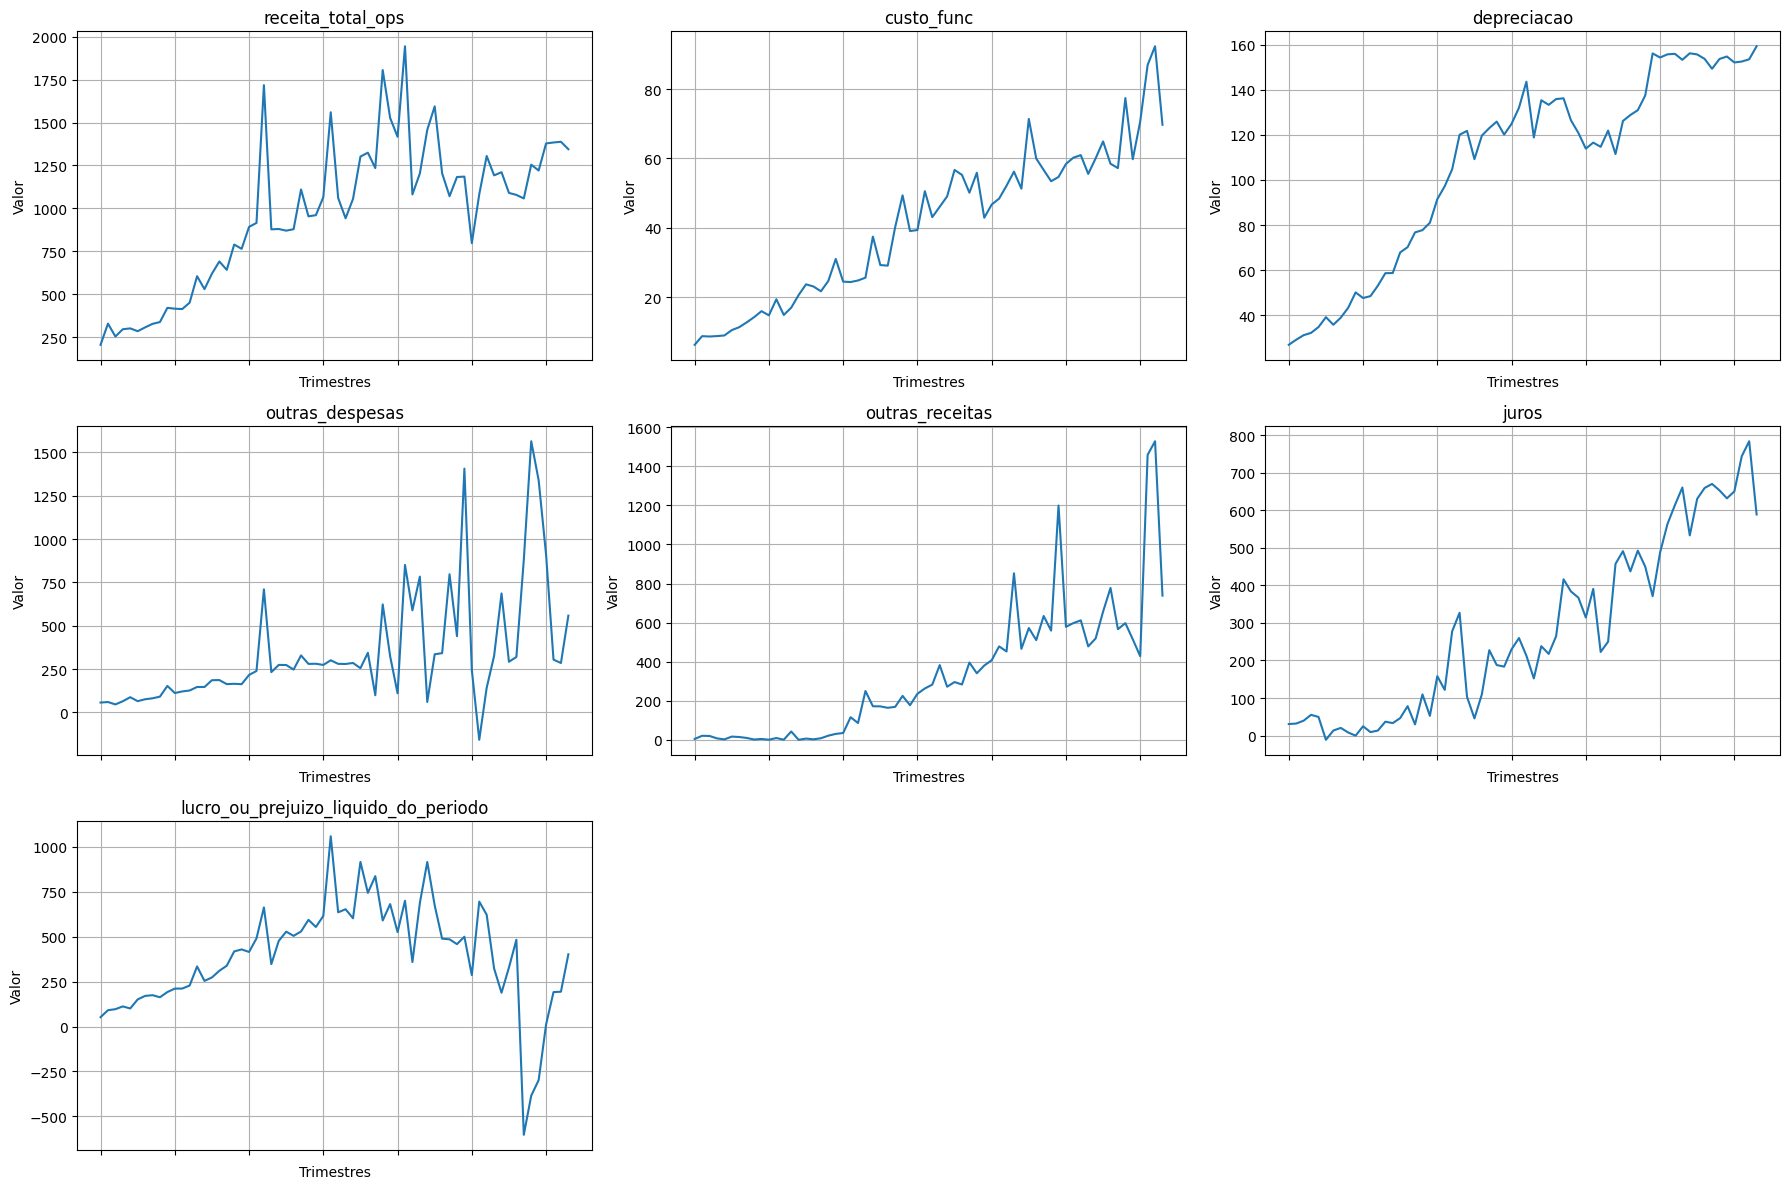

In [166]:
#Executa a função
plot_forecast(df)

#FIM